# Week 3 Linear regression

**The assignment**
- Explain briefly in your own words how linear regression works
- Your pre-processing steps
- The head() of the resulting data frame
- Splitting the dataset into a training and test set
- Training a linear regression model to predict the number of shares, using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable). Report:
    - How you selected the variables
    - An equation of the model (please use Markdown formulas)
    - Plots of the relation of your selected variables with the target
    - Comment on the linearity of those relationships
    - Evaluating the model on the test data
    - Predictive power of the model (R2, RMSE)
    - Investigating the residuals


## Explain how linear regression works
Linear regression is used in machine learning to find a single straight line that shows how on data on the x and y axes are related to each other and always consists of the basic formula $Y = b0 + b1X + e$ where $b0$ is the value of intercept so when the x-axes is on 0, $b1$ is the slope so this amount times the increase on $x$ (e.g. is when $x$ is going up 1 and you would want your line to go up 2 on the y-axes this value would be 2), $e$ is the residual which is for the error between the data and the line you would want to draw (when using the previous example say you would want the line to be 3 up if the x-axes is on 1 but on 5 when the x axes is 2 and 7 when the x axes is on 3 the $e$ would be 1). 

This line is calculated by the code on the used dataset, which tries to find the right formula and minimize the $e$ value as much as possible. You could use this formula to predict new results by inputing the other value. 

## Pre-processing steps and head()
Import needed packages and the dataset we use and display the head() of our dataframe

In [29]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import sklearn as sk #this is the most popular library for statistics and machine learning
import math
import numpy as np
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
df = pd.read_csv('Data Mashable.csv')
df = df[df['shares'] > 0]
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


Check correlation between value's, especially interested in shares variable

In [30]:
corr = df.corr()
corr

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


Based on this chose 5 variables that have relativly high corralation with shares and lesser between themselves (e.g. weekday_is_saturday and is_weekend didn't both make it). Variables I'm going to use are:

- n_tokens_title
- num_imgs
- num_videos
- is_weekend
- global_subjectivity

subset dataframe

In [31]:
df_subset = df[['id', 'n_tokens_title', 'num_imgs', 'num_videos', 'is_weekend', 'global_subjectivity', 'shares']]
df_subset.head()

,id,n_tokens_title,num_imgs,num_videos,is_weekend,global_subjectivity,shares
0,1,10,12,0,0,0.439379,2100
1,2,9,6,0,0,0.300454,274
2,3,11,0,1,0,0.575486,1500
3,4,8,2,0,0,0.327220,2000
4,5,9,18,0,0,0.507709,6000


## Split dataset into train and test
Roughly 75% goes in to the train set and 25% in the test set.

This random.rand() function provides random numbers between 0 and 1. It does it exactly as often as the length of the dataframe, that is the amount we put in the function. When this number is below 0.75 in roughly 75% of the cases it gives back a True and otherwise a False. This is an array that is sort of a list with the same datatype. 

We then subset the DataFrame for train where everything is True and for test where everything is False in that array (~). This provides a random subselection when run in both sets with roughly 25% in the test set. Printed the percentage when ran.

*Note that rerunning creates different DataFrames, so don't rerun for same test results.*


In [32]:
tt_array = np.random.rand(len(df_subset)) < 0.75
train = df_subset[tt_array]
test = df_subset[~tt_array]
(len(test)/len(df_subset))*100

24.820992839713586

## Training a linear regression model
Training a linear regression model to predict the number of shares, using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable). Report:
- How you selected the variables
- An equation of the model (please use Markdown formulas)
- Plots of the relation of your selected variables with the target
- Comment on the linearity of those relationships
- Evaluating the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigating the residuals

**Select variables**
Selected variables earlier in the proces based on correlation with the item we want to predict.

In [33]:
y_test = test['shares'] #We need to take out the rating as our Y-variable
X_test = test.loc[:,'n_tokens_title':'global_subjectivity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X_test.index = test['id'] #this stores the movie names in the column names, so we don't lose track of them later


y_train = train['shares'] #We need to take out the rating as our Y-variable
X_train = train.loc[:,'n_tokens_title':'global_subjectivity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X_train.index = train['id'] #this stores the movie names in the column names, so we don't lose track of them later
X_train.head()

,n_tokens_title,num_imgs,num_videos,is_weekend,global_subjectivity
id,,,,,
1,10,12,0,0,0.439379
2,9,6,0,0,0.300454
3,11,0,1,0,0.575486
4,8,2,0,0,0.327220
5,9,18,0,0,0.507709


In [40]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
# coef = pd.DataFrame(X_train.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
# coef

from sklearn.datasets import load_boston
from sklearn.svm import  SVR
boston = load_boston()
svr = SVR(kernel='linear')
svr.fit(X_test,y_test);
print('weights: ')
print(svr.coef_)
print('Intercept: ')
print(svr.intercept_)

weights: 
[[-24.90717566  13.30117893  -0.5812951  157.77946635  45.74415284]]
Intercept: 
[1624.84631553]


In [42]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.0014133703541124865

In [41]:
print('RMSE: ')
print(math.sqrt(mean_squared_error(y_test, y_test_p)))

RMSE: 
20012.563542299526


**An quation of the model**
The equasion based on our training set is the following: $y = 1624.85 + -24.91X + 13.30X + 157.78X + 45.74X + 20012.56$

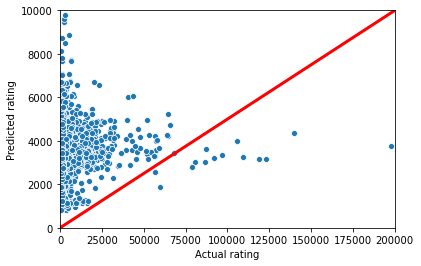

In [38]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([0,200000]) #limiting to get a better close up view 
plt.ylim([0,10000])
plt.plot([0, 200000], [0, 10000], color='red', lw=3) #Plot a diagonal length
plt.show()

**Comment on linearity**
Feel like I did something wrong, predictions are way of. Not sure what to conclude here. Could be get rid of some outliers earlier on as they pull the line wrong for the big amount. But also not sure if I mixed up train and test, r2 score seems to be 0.0014 which means we can only predict the amount of shares for 0.14% based on this data. 